# Image-Classification Fast.ai



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
bs = 16

In [ ]:
folder = 'without-mask'
file = 'urls_without.csv'

In [12]:
path = Path('/content/drive/My Drive/image-classification/data')

#dest.mkdir(parents=True, exist_ok=True)

In [ ]:
ls


data/  drive/  sample_data/


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
classes = ['without-mask','proper', 'improper']

In [ ]:
#download_images(path/'download', dest, max_pics=100, max_workers=0)

In [ ]:
cd ..


In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)


without-mask
proper
improper


In [14]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [ ]:
data.classes

['improper', 'proper', 'without-mask']

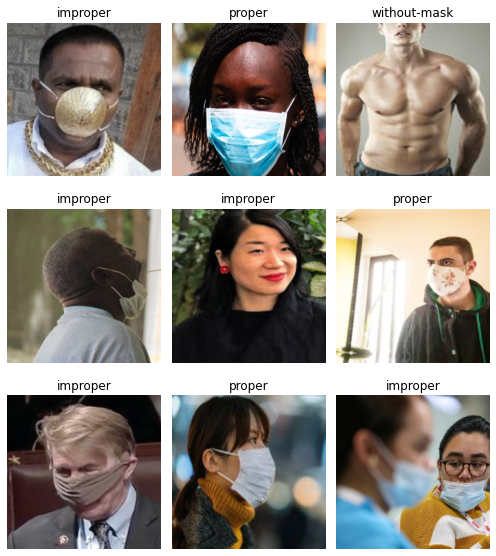

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['improper', 'proper', 'without-mask'], 3, 173, 43)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.866428,2.891136,0.720930,00:37
1,1.670418,0.884512,0.302326,00:08
2,1.324107,0.981064,0.279070,00:05
3,1.080022,0.945387,0.232558,00:05
4,0.932397,0.851469,0.232558,00:05


In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)


True

In [ ]:
len(data.valid_ds)

43

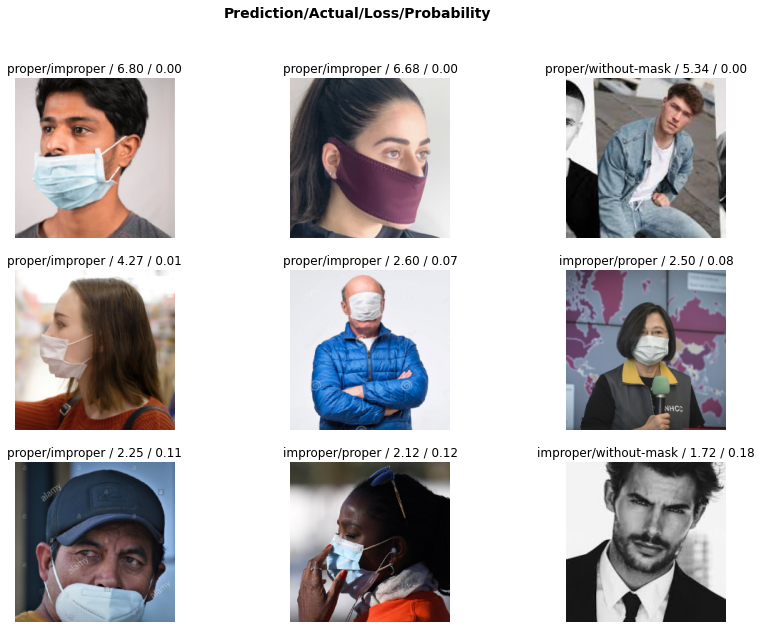

In [ ]:
interp.plot_top_losses(9, figsize=(14,10))

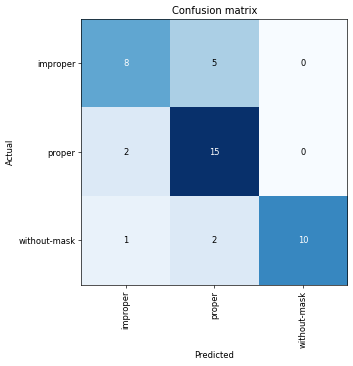

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [ ]:
interp.most_confused()

[('improper', 'proper', 5),
 ('proper', 'improper', 2),
 ('without-mask', 'proper', 2),
 ('without-mask', 'improper', 1)]

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


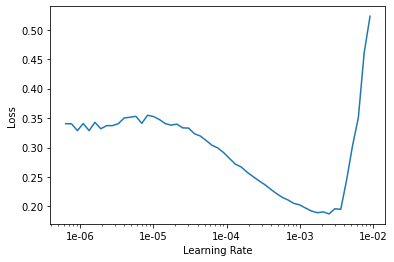

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=(slice(1e-05,1e-04)))

epoch,train_loss,valid_loss,error_rate,time
0,0.420351,0.761721,0.209302,00:05
1,0.354723,0.675428,0.186047,00:05
2,0.321725,0.601813,0.186047,00:05
3,0.288721,0.562388,0.209302,00:06
4,0.252639,0.558847,0.186047,00:05


In [ ]:
learn.save('stage-2')

## larger images


In [15]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=get_transforms(), size=512, bs=8).normalize(imagenet_stats)


In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.572549,0.679447,0.348837,00:12
1,1.119148,0.673936,0.279070,00:11
2,0.939295,0.711796,0.232558,00:11
3,0.810767,0.845538,0.255814,00:11
4,0.622630,0.822512,0.255814,00:11


In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


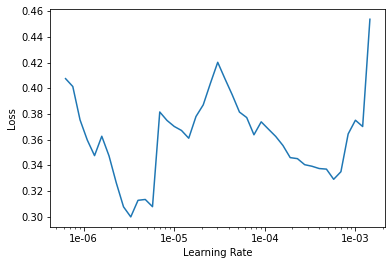

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.563759,0.795859,0.255814,00:12
1,0.514229,0.796671,0.279070,00:12
2,0.492434,0.778086,0.255814,00:12
3,0.468588,0.802121,0.255814,00:12
4,0.444737,0.773495,0.255814,00:12


In [ ]:
learn.save('stage3-512')

##resnet50

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


NameError: name 'path' is not defined

In [17]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [18]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.271906,1.550477,0.418605,00:22
1,1.511292,2.311017,0.279070,00:06
2,1.199021,2.526836,0.255814,00:05
3,0.933888,2.065646,0.186047,00:05
4,0.789306,1.715148,0.162791,00:05


In [19]:
learn.save('stage-4-resnet50')

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

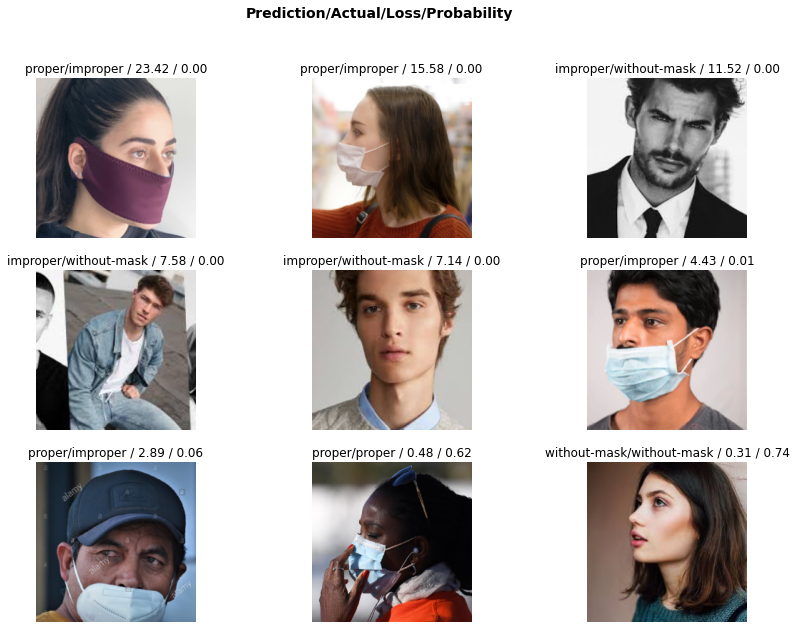

In [21]:
interp.plot_top_losses(9, figsize=(14,10))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


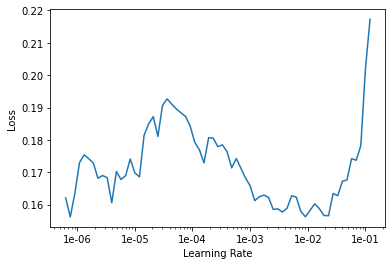

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.unfreeze()

In [26]:
learn.fit_one_cycle(5, max_lr=slice(1e-55,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.119727,0.889396,0.139535,00:05
1,0.074629,0.876311,0.139535,00:06
2,0.084677,0.849966,0.116279,00:06
3,0.102872,0.829073,0.116279,00:05
4,0.098555,0.799626,0.116279,00:06


In [27]:
interp = ClassificationInterpretation.from_learner(learn)

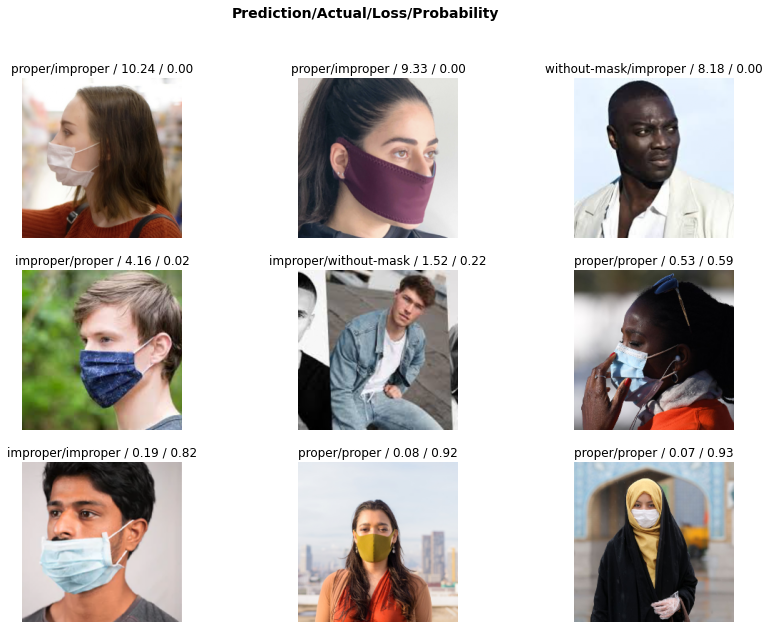

In [28]:
interp.plot_top_losses(9, figsize=(14,10))

In [29]:
learn.save('final')

In [30]:
learn.export('maskornot.pkl')

In [31]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256